In [2]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

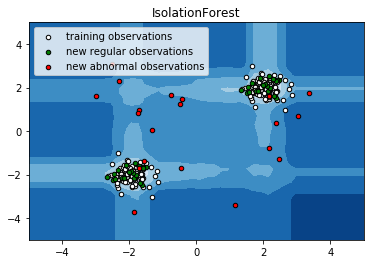

In [21]:
rng = np.random.RandomState(17)

#training data
X = 0.3* rng.randn(100,2)
X_train = np.r_[X+2, X-2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")



In [18]:
X.shape

(100, 2)

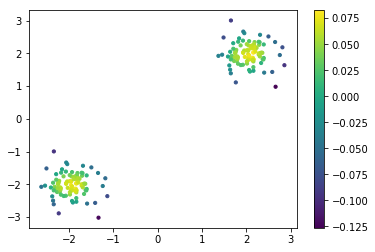

In [31]:
plt.scatter(X_train[:,0],X_train[:,1],c=clf.decision_function(X_train),s=10)
plt.colorbar()

In [29]:
clf.decision_function(X_train)

array([-5.15262706e-04,  4.31897766e-02, -2.89014824e-02,  7.32196212e-02,
        7.50270789e-02, -5.18218077e-02, -3.43839402e-02, -3.61675993e-03,
        2.02953403e-02,  3.07386726e-02, -5.34928395e-05,  7.56624282e-02,
        4.94450070e-02,  2.61660118e-03,  4.36493243e-02,  5.86031246e-02,
        6.42585671e-02,  4.34598785e-02,  6.77714139e-02, -3.84488786e-02,
       -8.91529082e-02,  6.35242996e-02,  8.18198064e-02,  6.67389652e-02,
        3.86707363e-02,  8.34288879e-03,  7.25484944e-02,  6.35085034e-02,
        1.24451723e-02,  4.15314164e-02,  6.55573478e-02, -7.04824280e-02,
        4.37428850e-02,  8.24774713e-02, -7.56408836e-02,  5.58288525e-02,
        6.49014454e-02,  5.52991244e-02, -2.76027441e-03,  4.67443615e-02,
        3.86582206e-02,  4.53977039e-02,  5.79998638e-02, -1.26318676e-01,
        3.22486581e-02,  2.10622004e-02, -9.56019424e-02,  2.67353801e-02,
        7.09718106e-02, -4.00504536e-02,  5.62764771e-02,  5.78960824e-02,
       -6.54838061e-02,  